# About the case study:

In this segment we will be working on a case study: **Analysing the Google Play Store Ratings Dataset**. Here we will start with some basic data wrangling techniques, for the data visualisation part, we will use **Matplotlib** and also **Seaborn**, which gives access to a lot of flexible and aesthetic plotting methods.

In [32]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [33]:
# importing the dataset

imdb_df = pd.read_csv(r'D:\Data Science\Natural Language Processing\Data Toolkit\Data Visualisation in Python\Data Visualisation Case Study\Case Study Notebook\googleplaystore_v2.csv')
imdb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Gathering information about the dataset**

In [34]:
print("There are",imdb_df.shape[0],"rows and",imdb_df.shape[1],"columns present in the dataset.")

There are 10841 rows and 13 columns present in the dataset.


## Data Handling and Cleaning

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

- For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows contaning the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
- Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column

In [35]:
# checking the datatypes of all the columns of the dataset

imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


**Missing Value Treatment**

- Obtaining Null Values present column wise in the dataset

In [36]:
imdb_df.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

From the above analysis it can be seen that the `Rating` column has the highest null count among all the columns presents.

Handling missing values for rating:
- Ratings is the target variable
- drop the records

In [37]:
# Dropping rows of which have Ratings data missing

imdb_df[imdb_df.Rating.isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [49]:
imdb_df = imdb_df[~ imdb_df.Rating.isnull()]

In [50]:
# checking the number of nulls in the Rating field again to cross-verify
imdb_df.Rating.isnull().sum()

0

In [52]:
# checking the shape of the dataframe

imdb_df.shape

(9367, 13)

In [54]:
# number of null values present column wise in the dataset

imdb_df.isnull().sum().sort_values(ascending = False)

Current Ver       4
Android Ver       3
Content Rating    1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Genres            0
Last Updated      0
dtype: int64

In [57]:
# imspect the nulls in the Andrioid Version column
imdb_df[imdb_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Here in the above it can be seen that row number 10472 has shifted values

In [61]:
imdb_df[imdb_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [63]:
imdb_df.reset_index(inplace = True)

In [64]:
imdb_df.columns

Index(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [66]:
imdb_df.drop(columns = "index", inplace = True)

In [67]:
imdb_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [68]:
imdb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [69]:
imdb_df[imdb_df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [77]:
imdb_df.drop([9117], inplace = True)

In [79]:
# Checking the nulls again in Andriod Version column to cross verify

imdb_df[imdb_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values:
- For numerical variables use mean and median
- For categorical variable use mode

In [81]:
# Checking the most common value in the Andriod Version column

imdb_df['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [85]:
# fill the nulls in the Andriod Version column with the above value

imdb_df['Android Ver'].fillna(value = "4.1 and up", inplace = True)

In [86]:
# check the nulls in the Android version column again to cross verify

imdb_df.isnull().sum().sort_values(ascending = False)

Current Ver       4
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64

In [87]:
# Check the most common value in the Current version column

imdb_df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [88]:
imdb_df['Current Ver'].fillna(value = "Varies with device", inplace = True)

In [89]:
imdb_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Handling Incorrect Data Types

In [90]:
# Check the datatypes of the columns
imdb_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [91]:
# Analysing price column

imdb_df.Price

0       0
1       0
2       0
3       0
4       0
       ..
9362    0
9363    0
9364    0
9365    0
9366    0
Name: Price, Length: 9366, dtype: object

In [93]:
imdb_df.Price.astype('int')

ValueError: invalid literal for int() with base 10: '$4.99'

In [100]:
imdb_df.Price = imdb_df.Price.str.replace('$','')

In [106]:
imdb_df.Price = imdb_df.Price.astype('float')

In [107]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 9366
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [108]:
imdb_df.Price.dtype

dtype('float64')

In [109]:
# Average price of applications
imdb_df.Price.mean()

0.9609278240444159

In [110]:
imdb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [112]:
imdb_df.Reviews = imdb_df.Reviews.astype('int')

In [113]:
imdb_df.Reviews.info()

<class 'pandas.core.series.Series'>
Int64Index: 9366 entries, 0 to 9366
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
9366 non-null   int32
dtypes: int32(1)
memory usage: 109.8 KB


In [114]:
imdb_df.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

<AxesSubplot:xlabel='Reviews'>

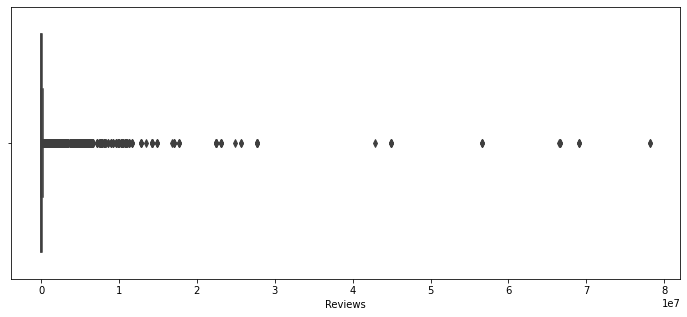

In [117]:
plt.figure(figsize = (12, 5))
sns.boxplot(x= imdb_df.Reviews)

In [118]:
# Analyse the Installs column

imdb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [119]:
imdb_df.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [125]:
imdb_df.Installs = imdb_df.Installs.str.replace('+','')

In [128]:
imdb_df.Installs = imdb_df.Installs.str.replace(",",'')

In [129]:
imdb_df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [132]:
imdb_df.Installs = imdb_df.Installs.astype(int)

In [133]:
# Average Installs of Application in the dataset
imdb_df.Installs.mean()

17897443.726030324

## Sanity Checks

The data that we have needs to make sense and therefore we can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:
- Rating is between 1 and 5 for all the apps
- Number of Reviews is less than or equal to the number of Installs
- Free Apps shouldn't have a price greater than 0

In [138]:
# perform the sanity checks on the Reviews column

imdb_df[imdb_df.Rating> 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [139]:
# perform the sanity checks on prices of free apps
imdb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [144]:
imdb_df[(imdb_df.Type == 'Free') & (imdb_df.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## Outliers Analysis Using Boxplot

Now you need to start idenitfying and removing extremen values or outliers from our dataset. These values can tilt our analysis and often provider us with a biased perspective of the data available. This is where we'll start utilising visualisation to acheive our tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable.

Using a box plot we can identify the outlers as follows:
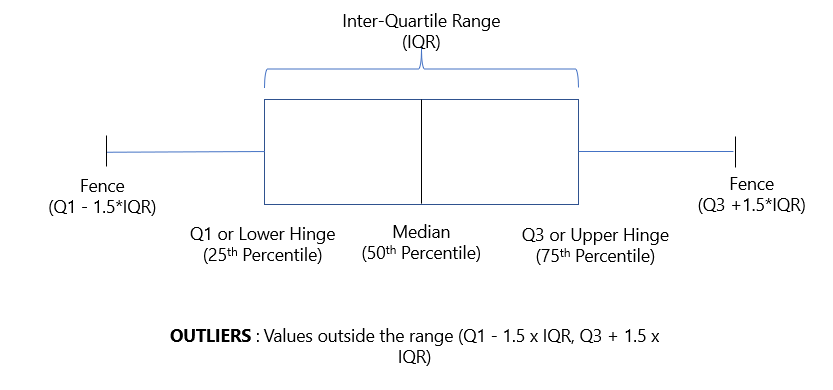

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, we should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.

- In the former case, we should dertemine whether or not removing them would add value to our analysis procedure.

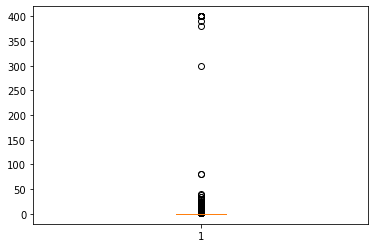

In [146]:
# create a boxplot for the price column

plt.boxplot(imdb_df.Price)

plt.show()

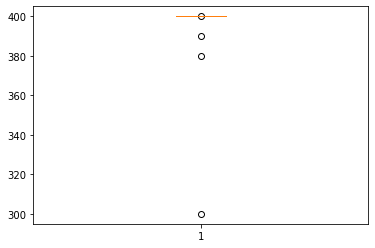

In [150]:
# check the apps with more than 200

plt.boxplot(imdb_df.Price[imdb_df.Price>= 200])
plt.show()

In [157]:
# clean the price column

imdb_df = imdb_df[ ~ (imdb_df.Price > 200)]

<AxesSubplot:xlabel='Price'>

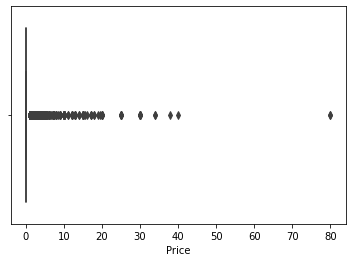

In [159]:
sns.boxplot(imdb_df.Price)

<AxesSubplot:xlabel='Price'>

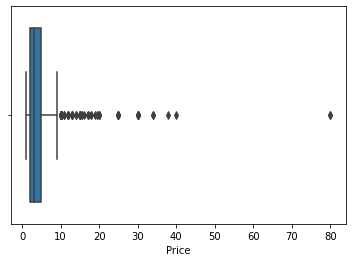

In [160]:
# Create a box plot for Paid applications

sns.boxplot(imdb_df.Price[imdb_df.Type == 'Paid'])

In [161]:
# Check the apps with price more than 30

imdb_df[imdb_df.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2170,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2215,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2278,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2314,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2326,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5055,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [162]:
imdb_df = imdb_df[~(imdb_df.Price > 30)]

<AxesSubplot:xlabel='Price'>

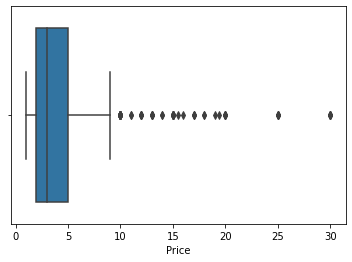

In [163]:
sns.boxplot(imdb_df.Price[imdb_df.Type == 'Paid'])

## Histograms

Histograms can also be used in conjucation with boxplots for data cleaning and data handling pruposes. We can use it check the spread of a numeric variable.

Histograms generally work by bucketing the entire range of values that a particualr variable takes to specific bins. Afte that it uses vertical bars to denote the total number of records in a specific bin, which is also known as its frequency.

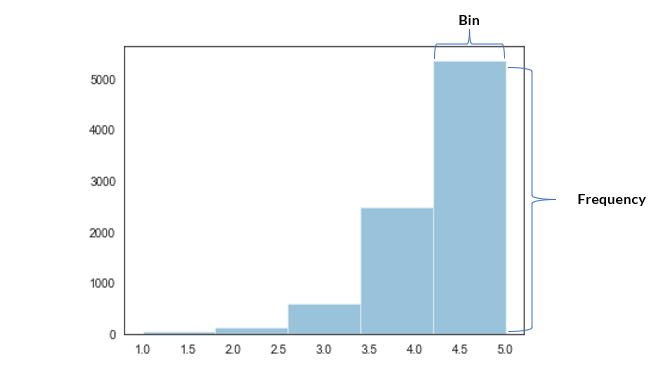

We can just adjust then number of bins to improve its granularity

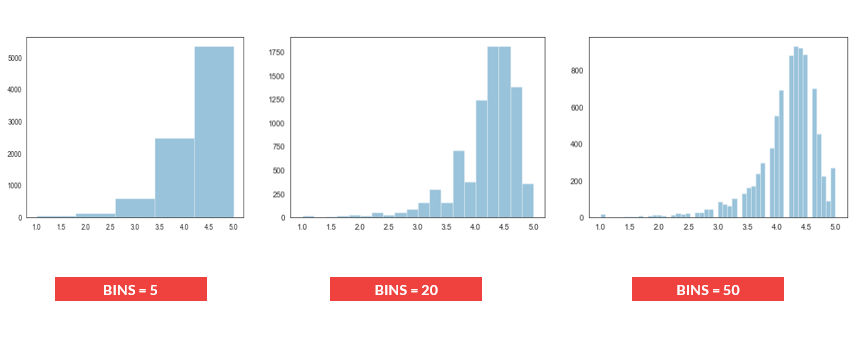


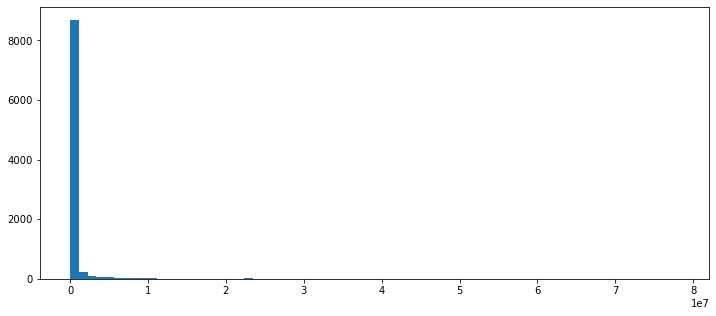

In [192]:
# Create a histogram of the Reviews
plt.figure(figsize = (12, 5))
plt.hist(imdb_df.Reviews, bins = 70)
plt.show()

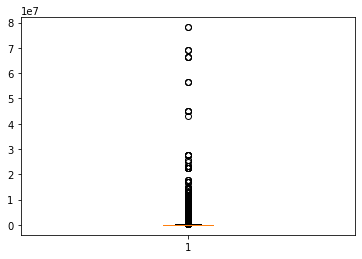

In [169]:
plt.boxplot(imdb_df.Reviews)

plt.show()

In [170]:
# Check records with 1 million reviews

imdb_df[imdb_df.Reviews > 1_000_000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
132,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
145,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
179,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
184,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
191,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
8902,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
9021,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
9227,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


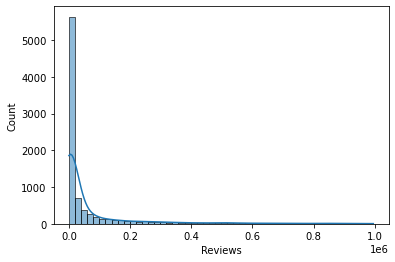

In [176]:
sns.histplot(imdb_df.Reviews[imdb_df.Reviews < 1_000_000], bins = 50, kde = True)
plt.show()

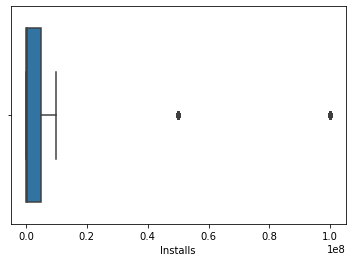

In [182]:
# Create a boxplot for the Install by removing all the apps having more than or equal to 100 million installs
sns.boxplot(imdb_df.Installs[~(imdb_df.Installs>100_000_000)])
plt.show()

In [183]:
imdb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


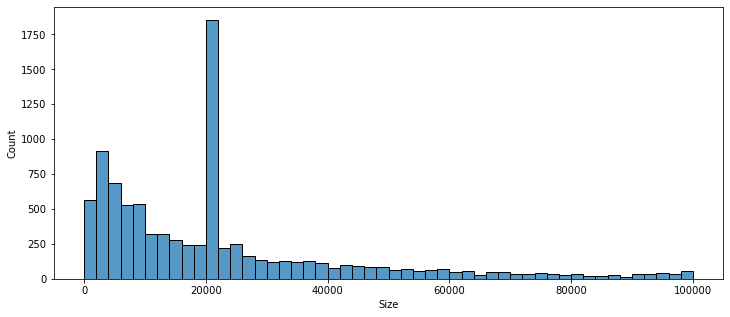

In [186]:
# Plot a histogram for Size as well

plt.figure(figsize = (12, 5))
sns.histplot(imdb_df.Size, bins = 50)

plt.show()

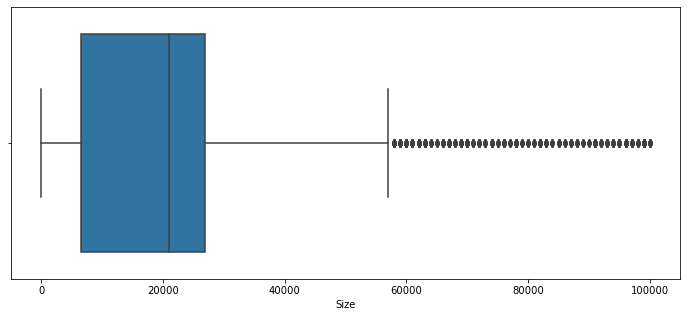

In [188]:
# Create a boxplot for size column and report back the median value

plt.figure(figsize = (12, 5))
sns.boxplot(imdb_df.Size)

plt.show()

In [191]:
print("Median of the application size:",imdb_df.Size.median())

Median of the application size: 21000.0
